In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# first-order reaction A→P
kA = lambda T: 1.2e9 * np.exp(-72.7475 / 8.314e-3 / T)  # 1/s

VR      = 0.1       # m3
CA0     = 1         # kmol/m3
v       = 1.667e-3  # m3/s
T0      = 350       # K
dH      = -5e7      # J/kmol
rho     = 1000      # kg/m3
Cp      = 239       # J/(kg*K)
Tc      = 305       # K
UA      = 833.33    # J/(s*K)

In [16]:
def kCA(CA, T):
    return (CA0 - CA) * v / VR - kA(T) * CA

def kT(CA, T):
    return (-dH * kA(T) * CA) / (rho * Cp) + \
        (T0 - T) * v / VR + UA * (Tc - T) / (VR * rho * Cp)

In [17]:
# def kT(CA, T):
#     return -v * dH1 * (CA0 - CA) / (VR * rho * Cp) + \
#         (T0 - T) * v / VR + UA * (Tc - T) / (VR * rho * Cp)

In [18]:
t_max = 600
dt = 0.1

t = np.zeros(1)
CA = np.array([0.5])
T = np.array([350])
Q = np.zeros(1)

while t[-1] < t_max:
    print(f't = {t[-1]:.2f} s, CA = {CA[-1]:.3f} kmol/m3, T = {T[-1]:.2f} K')

    if np.isnan(CA[-1]):
        raise Exception('Solution Diverged')

    CAi, Ti = CA[-1], T[-1]

    k1 = kCA(CAi, Ti)
    k2 = kCA(CAi + dt / 2 * k1, Ti)
    k3 = kCA(CAi + dt / 2 * k2, Ti)
    k4 = kCA(CAi + dt * k3, Ti)
    CA_new = CAi + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)


    k1 = kT(CAi, Ti)
    k2 = kT(CAi, Ti + dt / 2 * k1)
    k3 = kT(CAi, Ti + dt / 2 * k2)
    k4 = kT(CAi, Ti + dt * k3)
    T_new = Ti + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
    t = np.append(t, t[-1] + dt)
    CA = np.append(CA, CA_new)
    T = np.append(T, T_new)
    Q = np.append(Q, -dH * VR * kA(T_new) * CA_new)


sol = {'T': T, 'CA': CA, 'Q': Q}

t = 0.00 s, CA = 0.500 kmol/m3, T = 350.00 K
t = 0.10 s, CA = 0.500 kmol/m3, T = 350.02 K
t = 0.20 s, CA = 0.500 kmol/m3, T = 350.04 K
t = 0.30 s, CA = 0.500 kmol/m3, T = 350.05 K
t = 0.40 s, CA = 0.500 kmol/m3, T = 350.07 K
t = 0.50 s, CA = 0.500 kmol/m3, T = 350.09 K
t = 0.60 s, CA = 0.500 kmol/m3, T = 350.11 K
t = 0.70 s, CA = 0.500 kmol/m3, T = 350.13 K
t = 0.80 s, CA = 0.500 kmol/m3, T = 350.14 K
t = 0.90 s, CA = 0.500 kmol/m3, T = 350.16 K
t = 1.00 s, CA = 0.500 kmol/m3, T = 350.18 K
t = 1.10 s, CA = 0.500 kmol/m3, T = 350.20 K
t = 1.20 s, CA = 0.500 kmol/m3, T = 350.22 K
t = 1.30 s, CA = 0.500 kmol/m3, T = 350.24 K
t = 1.40 s, CA = 0.500 kmol/m3, T = 350.26 K
t = 1.50 s, CA = 0.500 kmol/m3, T = 350.28 K
t = 1.60 s, CA = 0.500 kmol/m3, T = 350.30 K
t = 1.70 s, CA = 0.500 kmol/m3, T = 350.32 K
t = 1.80 s, CA = 0.500 kmol/m3, T = 350.34 K
t = 1.90 s, CA = 0.500 kmol/m3, T = 350.36 K
t = 2.00 s, CA = 0.500 kmol/m3, T = 350.38 K
t = 2.10 s, CA = 0.500 kmol/m3, T = 350.40 K
t = 2.20 s

[Text(0, 0.5, 'Concentration (kmol/m3)')]

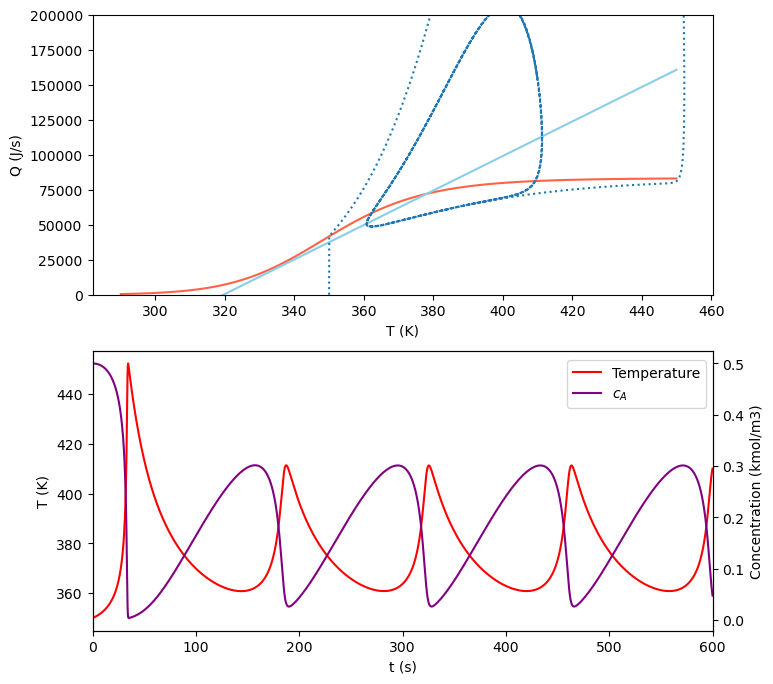

In [19]:
fig = plt.figure(figsize=(8, 8))
axQ = fig.add_subplot(211)
axT = fig.add_subplot(212)

tau = VR / v

T = np.linspace(290, 450, 100)
Q_gen = -dH * VR * kA(T) * CA0 / (1 + kA(T) * VR / v)
Q_rem = v * rho * Cp * (T - T0) + UA * (T - Tc)
axQ.plot(T, Q_gen, color='tomato')
axQ.plot(T, Q_rem, color='skyblue')
axQ.plot(sol['T'], sol['Q'], ':')
axQ.set(xlabel='T (K)', ylabel='Q (J/s)')
axQ.set_ylim(0, 2e5)

axT.plot(t, sol['T'], color='red', label='Temperature')
axC = axT.twinx()
axC.plot(t, sol['CA'], color='purple', label='$c_A$')
fig.legend(loc='lower left', bbox_to_anchor=(0.71, 0.38))
axT.set(xlabel='t (s)', ylabel='T (K)',
        xlim=(0, t_max))
axC.set(ylabel='Concentration (kmol/m3)')